# Find the Flag

In this project, we’ll use decision trees to predict the continent a country is located on based on several features of its flag. For instance, some of the colors are good indicators as well as the presence or absence of certain shapes could give one a hint. We’ll explore which features are the best to use and the best way to create a decision tree. The [**Flags Data Set**](https://archive.ics.uci.edu/ml/datasets/Flags) used in this project is provided by UCI’s Machine Learning Repository.

Columns description:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

## Investigate the Data

1.Let’s start with necessary imports and uploading data from `flags.csv` to the variable `flags`.

In [1]:
# Basic imports related to analysis
import pandas as pd

# Imports for ml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Imports for visualisationin
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
flags = pd.read_csv('flags.csv')
flags

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [9]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [ ]:




data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 ]]




## Creating Features and Labels

Considering we our goal, the `Landmass` column seems like an obvious variant for labels within this set.

In [13]:
labels = flags[['Landmass']]
labels.head()

,Landmass
0,5
1,3
2,4
3,6
4,3


We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

In [23]:
data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange', 'Circles', 'Crosses','Saltires','Quarters','Sunstars',
'Crescent','Triangle']]

Finally, let’s split these DataFrames into a training set and test set.

In [24]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

## Make and Test the Model

In [25]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data, train_labels) 
tree.score(test_data, test_labels)

0.4489795918367347

In [26]:
tree.tree_.max_depth

10

Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time. 

## Tuning the Model

We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better. 

In [27]:
scores = []

for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels) 
  scores.append(tree.score(test_data, test_labels))

Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

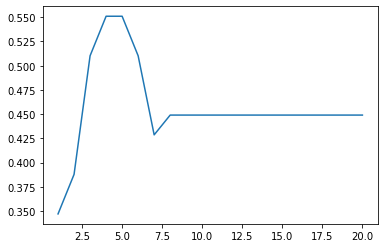

In [28]:
plt.plot(range(1, 21), scores)
plt.show()

If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.